In [2]:
import sys
import logging
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import numpy as np
from PyComplexHeatmap import *
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from itertools import groupby
from matplotlib.colors import LogNorm, Normalize
from matplotlib.colors import ListedColormap

In [ ]:
## Adjust the path to Byproducts_host.py
sys.path.append('[enter path to Byproducts_host.py]')

In [ ]:
from Byproducts_host import byproduct_host_ratio

In [3]:
## Specify folder where input files from https://zenodo.org/records/14360745 are stored on your computer
folder = "[file_to_folder_Zenodo_link]"
# keep all information as it is if you do not change the name of the files
file = "SI_1_BtH_ratios_v0.1.xlsx"
file_p = "SI_5_Production_2021.xlsx"
sheetname = "ResC"
sheet_RR_general = "RR_table"
sheet_RR_specific = "Milling_RR_deposit"
sheet_results_av = "results_av_"+sheetname
sheet_results_acc = "results_accessible_ResC"
sheet_results_pot_acc = "results_pot_acc_ResC"
sheet_rr_data = "rr_data_"+sheetname

## Useful functions to build

In [4]:
## Function needed to plot host tonnage based weighted distribution of BtH ratios
def reindex_df(df, weight_col):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    if len(df.reindex(df.index.repeat(df[weight_col]))) > 0:
        df = df.reindex(df.index.repeat(df[weight_col]))
        df.reset_index(drop=True, inplace=True)
    return(df)

In [5]:
def add_col_ones(df,col_name):
    if col_name not in df.columns:
        df[col_name] = 1
    return df

In [6]:
from itertools import groupby

def add_vertical_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .02, ypos],
                      transform=ax.transAxes, color='gray')
    line.set_clip_on(False)
    ax.add_line(line)

def add_horizontal_line(ax, xpos, ypos,df):
    line = plt.Line2D([xpos+df.columns.size, xpos], [ypos, ypos], color='red')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df,list_pure_byproduct):
    ypos = -0.025
    scale = 1./df.columns.size
    for level in range(df.columns.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.columns,level):
            lxpos = (pos + .5 * rpos)*scale
            if ypos == -0.025 and label in list_pure_byproduct:
                ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes, size = 15,weight = "bold")
            else:
                ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes, size = 15)
            add_vertical_line(ax, pos*scale, ypos)
            pos += rpos
        add_vertical_line(ax, pos*scale , ypos)
        ypos -= .02

Sections 1.1 to 1.4 should not necessarily be computed if of you are using directly the dataset from Zenodo https://zenodo.org/records/14360745

Users are invited to directly run from section 2

### 1.1Load byproduct_host_ratio class 

In [ ]:
# Not necessary if using v0.1 of dataset
obj = byproduct_host_ratio(folder,file,sheetname,sheet_RR_general,sheet_RR_specific)

### 1.2 Calculate "available" BtH ratio using data referred in input file

In [ ]:
# Not necessary if using v0.1 of dataset
## Will raise error message if you run it without deleting "results_av_ResC" sheet in SI_1_BtH_ratios_v0.1.xlsx
obj.calc_available_hb_ratios()

### 1.3 Calculate "accessible" BtH ratio using data referred in input file

In [ ]:
# Not necessary if using v0.1 of dataset
## Will raise error message if you run it without deleting "results_accessible_ResC" sheet in SI_1_BtH_ratios_v0.1.xlsx
obj.calc_accessible_hb_ratios()

### 1.4 Calculate "potentially accessible" BtH ratio using data referred in input file 

In [ ]:
# Not necessary if using v0.1 of dataset
## Will raise error message if you run it without deleting "results_pot_acc_ResC" sheet in SI_1_BtH_ratios_v0.1.xlsx
obj.calc_pot_acc_hb_ratios()

### 2. Load dataframe of interest 

In [7]:
df_input_data = pd.read_excel(folder+file,sheet_name=sheetname,index_col="Project_name")
df_rr_data =  pd.read_excel(folder+file,sheet_name=sheet_rr_data,index_col="Project_name")
df_plot_av = pd.read_excel(folder+file,sheet_name=sheet_results_av,index_col="Project_name")
df_plot_acc = pd.read_excel(folder+file,sheet_name=sheet_results_acc,index_col="Project_name")
df_plot_pot_acc = pd.read_excel(folder+file,sheet_name=sheet_results_pot_acc,index_col="Project_name")
pairs = list(df_plot_acc.columns[4:])
el = list(df_input_data.columns[12:75])
prod_2021 = pd.read_excel(folder+file_p,sheet_name = "Production_2021").sort_values(by="Prod (Mt)",ascending=False)

In [8]:
host = [p[p.find("/")+2:] for p in pairs]
byproduct = [p[:p.find("/")-1] for p in pairs]
## host list with unique host
hosts = []
byproducts = []
for h in host:
    if h not in hosts:
        hosts.append(h)
for b in byproduct:
    if b not in byproducts:
        byproducts.append(b)

### 3. Plot figure 2

-2.229082331572862 -0.3858714606020629
-2.631524011286881 0.3594701909014717
-5.666376546809109 0.5039869783072921
-6.072565177321579 0.5233292940459812
-7.619057183599643 0.5969717705354128
-7.619057183599643 0.5969717705354128


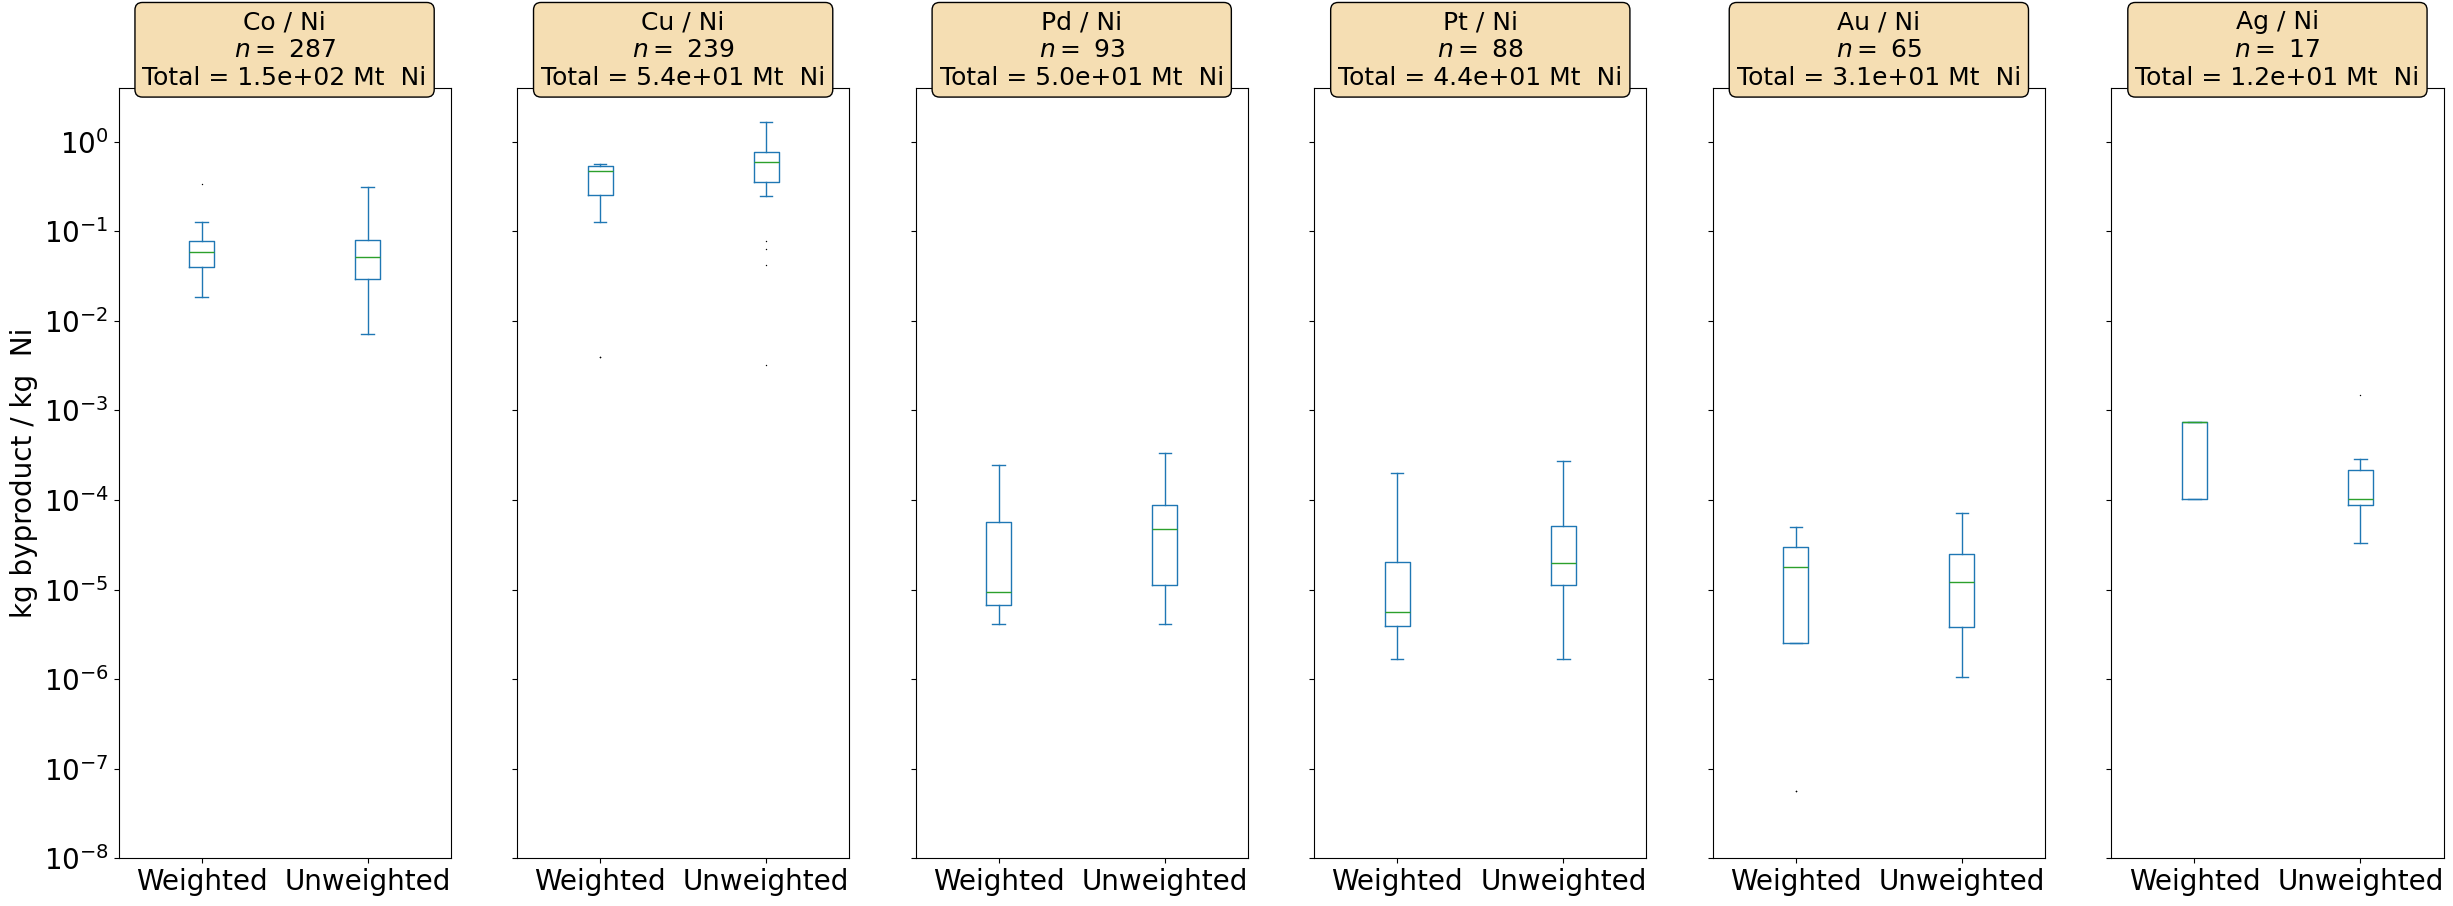

In [27]:
ncol = 1

pairs = ["Co / Ni","Cu / Ni","Pd / Ni","Pt / Ni","Au / Ni","Ag / Ni"] #, Sc / Ni

nrow = len(pairs)


props = dict(boxstyle='round', facecolor='wheat', alpha=1)

fig, axes = plt.subplots(nrows=1, ncols=nrow,sharey=True, figsize=(30, 10))


for i in range(0,nrow):
    host = pairs[i][pairs[i].rfind("/")+1:]
    byproduct = pairs[i][:pairs[i].rfind("/")]
    #print(pairs[i])
    df_plot_av = add_col_ones(df_plot_av,"All equal")
    df_selec_av = df_plot_av[["Ore tonnage","All equal","Deposit_type",pairs[i]]]

    df_selec_av = df_selec_av[(df_selec_av[pairs[i]].notnull())]

    
    df_selec_av.loc[:,pairs[i]] = np.log10(df_selec_av.loc[:,pairs[i]].astype(float))

    
    
    df_selec_av_no_weighting = reindex_df(df_selec_av, weight_col = 'All equal')
    df_selec_av_w = reindex_df(df_selec_av, weight_col = 'Ore tonnage')
    

    
    df_plot_av_compare = pd.DataFrame(index = df_selec_av_w.index)
    
    df_plot_av_compare["Weighted"] = df_selec_av_w[pairs[i]].astype(float)
    #print("df  weighted",np.mean(list(df_plot_av_compare["Weighted"])))
    
    df_plot_av_compare["Unweighted"] = df_selec_av_no_weighting[pairs[i]].astype(float)
    #print("df not weighted",np.mean(list(df_selec_av_no_weighting[pairs[i]])))

    
    ## Distinguishing weighting from non weighting
    flierprops = dict(marker='.', markerfacecolor='w', markersize=1,
                     linestyle='none', markeredgecolor='k', markeredgewidth = 0.5)
    df_plot_av_compare.plot(kind='box', ax = axes[i],flierprops = flierprops )
    

    total_tonnage = round(sum(df_selec_av["Ore tonnage"]),1)
    textbox = '\n'.join((byproduct + "/" + host,"$n =$ "+str(len(df_selec_av)),   # byproduct + "/ " + host ,
                   "Total = "+str(f"{total_tonnage:.1e}")+" Mt "+host))
    start_list = end_list = []
    start, end = axes[i].get_ylim()
    print(start,end)
    start_list.append(start)
    end_list.append(end)
    axes[0].yaxis.set_ticks(np.arange(m.floor(min(start_list)), m.floor(max(end_list)+1), 1))
    yticks = [item.get_position()[1] for item in axes[0].get_yticklabels()]
    ylabels = ["$\\mathdefault{10^{"+str(int(item))+"}}$" for item in yticks]
    
    axes[0].set_yticks(yticks)
    axes[0].set_yticklabels(ylabels)


    axes[0].set_ylabel("kg byproduct"+" / kg "+host,fontsize=20)
    
    axes[i].text(0.5, 1.05, textbox,fontsize=18, horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes, bbox=props)
    axes[0].tick_params(axis='y', labelsize=20)
    

    axes[i].tick_params(axis='x', labelsize=20)


### 4. Plot figure 3 

-6.137309457782738 -2.7601766708425544
[Text(0, -7, '−7'), Text(0, -6, '−6'), Text(0, -5, '−5'), Text(0, -4, '−4'), Text(0, -3, '−3'), Text(0, -2, '−2'), Text(0, -1, '−1')]
-6.31026766370748 -2.402141498183921
[]
-6.333775744612111 -1.9084717991866744
[]
-6.33562931018089 -1.8695469222423127
[]
-6.389347602978344 -0.7414627734957844
[]


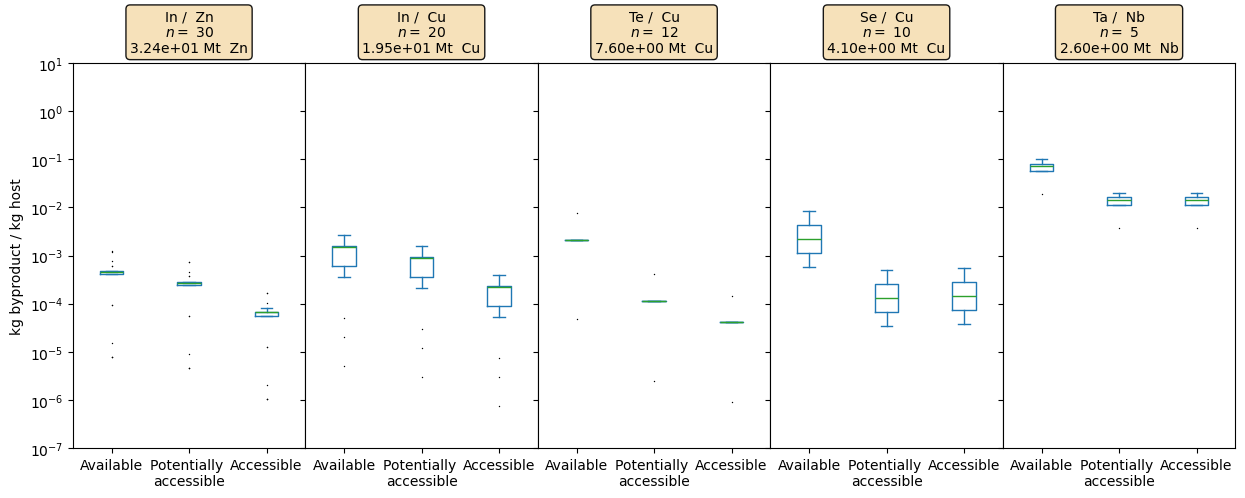

In [26]:
## Please enter list of pairs here
pairs = ["In / Zn","In / Cu", "Te / Cu","Se / Cu","Ta / Nb"]
#pairs = ["Co / Cu","Co / Ag","Au / Zn","Pb / Cu","Ga / Al"]
#pairs = ["La / Nd", "Pr / Nd", "Gd / Nd", "Dy / Nd","Er / Nd"]
nrow = len(pairs)
ncol = 1
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)

fig, axes = plt.subplots(nrows=ncol, ncols= nrow, sharey=True, figsize=(15, 5))
#print(axes[0,0])

for i in range(0,nrow):
    host = pairs[i][pairs[i].rfind("/")+1:]
    byproduct = pairs[i][:pairs[i].rfind("/")]

    df_plot_av = add_col_ones(df_plot_av,"All equal")
    df_plot_acc = add_col_ones(df_plot_acc,"All equal")
    df_plot_pot_acc = add_col_ones(df_plot_pot_acc,"All equal")
    df_selec_av = df_plot_av[["Ore tonnage","Deposit_type",pairs[i]]]
    df_selec_acc = df_plot_acc[["Ore tonnage","Deposit_type",pairs[i]]]
    df_selec_pot_acc = df_plot_pot_acc[["Ore tonnage","Deposit_type",pairs[i]]]

    df_selec_av = df_selec_av[(df_selec_av[pairs[i]].notnull())]
    df_selec_acc = df_selec_acc[(df_plot_acc[pairs[i]].notnull())]
    df_selec_pot_acc = df_selec_pot_acc[(df_plot_pot_acc[pairs[i]].notnull())]
    

    df_selec_av.loc[:,pairs[i]] = np.log10(df_selec_av.loc[:,pairs[i]].astype(float))
    df_selec_acc.loc[:,pairs[i]] = np.log10(df_selec_acc.loc[:,pairs[i]].astype(float))
    df_selec_pot_acc.loc[:,pairs[i]] = np.log10(df_selec_pot_acc.loc[:,pairs[i]].astype(float))

    df_selec_av_w = reindex_df(df_selec_av, weight_col = 'Ore tonnage')
    df_selec_pot_acc_w = reindex_df(df_selec_pot_acc, weight_col = 'Ore tonnage')
    df_selec_acc_w = reindex_df(df_selec_acc, weight_col = 'Ore tonnage')

    df_selec_av_w[pairs[i]] = df_selec_av_w[pairs[i]].astype(float)
    df_selec_pot_acc_w[pairs[i]] = df_selec_pot_acc_w[pairs[i]].astype(float)
    df_selec_acc_w[pairs[i]] = df_selec_acc_w[pairs[i]].astype(float)

    df_selec_w = pd.DataFrame(index=df_selec_av_w.index)
    df_selec_w["Available"] = df_selec_av_w[pairs[i]]
    df_selec_w["Potentially \naccessible"] = df_selec_pot_acc_w[pairs[i]]
    df_selec_w["Accessible"] = df_selec_acc_w[pairs[i]]
    #df_selec_w["Acc. GLO"] = df_selec_acc_w_glo[pairs[i]]
    
    # plot. Set color of marker edge
    flierprops = dict(marker='.', markerfacecolor='w', markersize=1,
                     linestyle='none', markeredgecolor='k', markeredgewidth = 0.5)
    
    df_selec_w.plot(kind='box', ax = axes[i],flierprops = flierprops ) #.set_yscale('log')



    total_tonnage = round(sum(df_selec_av["Ore tonnage"]),1)
    if total_tonnage == 0:
        total_tonnage = round(sum(df_selec_av["Ore tonnage"])*1000,1)
        textbox = '\n'.join( (byproduct + "/ " + host ,
                        "$n =$ "+str(len(df_selec_acc)),
                   ""+str(f"{total_tonnage:.2e}")+" kt "+host))
    else:
        textbox = '\n'.join( (byproduct + "/ " + host ,
                        "$n =$ "+str(len(df_selec_acc)),
                   ""+str(f"{total_tonnage:.2e}")+" Mt "+host))
    



    axes[i].set_ylabel("kg byproduct / kg host")

    start_list = end_list = []
    start, end = axes[i].get_ylim()
    print(start,end)
    start_list.append(start)
    end_list.append(end)
    axes[0].yaxis.set_ticks(np.arange(m.floor(min(start_list)), m.floor(max(end_list)+3), 1))
    yticks = [item.get_position()[1] for item in axes[0].get_yticklabels()]
    ylabels = ["$\\mathdefault{10^{"+str(int(item))+"}}$" for item in yticks]

    print(axes[i].get_yticklabels())
    axes[0].set_yticks(yticks)
    axes[0].set_yticklabels(ylabels)
    axes[i].text(0.5, 1.08, textbox, horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes, bbox=props)

plt.subplots_adjust(wspace=0,hspace=0.2)


## 4.1 Calculate share of global production of element where element is host (on the basis of quantity of element)

In [13]:
hosts_final = [e for e in list(prod_2021.loc[:,"Element listed"]) if e in hosts]
df_res_clean = pd.read_excel(folder+file,sheet_name=sheetname,index_col="Project_name")

In [11]:
prod_2021_host = prod_2021.loc[prod_2021.loc[:,"Element listed"].isin(hosts_final)].set_index("Element listed")

In [14]:
df_share_prod_hosts = pd.DataFrame(index = hosts_final,columns=["Share"])
for host in df_share_prod_hosts.index:
    df_share_prod_hosts.loc[host,"Share"]= df_res_clean[(df_res_clean.loc[:,"Host"]==host)].loc[:,host].sum()/df_res_clean.loc[:,host].sum()

In [15]:
prod_2021_ashost = pd.DataFrame(index = hosts_final ,columns=["Prod_as_host"])
for i in prod_2021_host.index:
    prod_2021_ashost.loc[i,"Prod_as_host"] = prod_2021_host.loc[i,"Prod (Mt)"]*df_share_prod_hosts.loc[i,"Share"]

## 4.2 Calculate share of tonnage where byproduct is linked to host over total host production 

In [16]:
non_fossils = list(df_res_clean.columns[12:75])
df_share = pd.DataFrame(index=non_fossils,columns=non_fossils).fillna(0)
for host in df_share.index:
    for byproduct in df_share.columns:
        if host not in list(df_res_clean.loc[:,"Host"]):
            df_share.loc[host,byproduct] = 0
        else:
            tonnage_host_byproduct = df_res_clean[(df_res_clean.loc[:,"Host"]==host) & (df_res_clean.loc[:,byproduct])].loc[:,"Ore tonnage"].sum()
            df_share.loc[host,byproduct] = tonnage_host_byproduct/(df_res_clean[(df_res_clean.loc[:,"Host"]== host)].loc[:,"Ore tonnage"].sum())

C:\Users\Titouan Greffe\AppData\Local\Temp\ipykernel_24796\1306896128.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_share = pd.DataFrame(index=non_fossils,columns=non_fossils).fillna(0)
C:\Users\Titouan Greffe\AppData\Local\Temp\ipykernel_24796\1306896128.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.04' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_share.loc[host,byproduct] = tonnage_host_byproduct/(df_res_clean[(df_res_clean.loc[:,"Host"]== host)].loc[:,"Ore tonnage"].sum())
C:\Users\Titouan Greffe\AppData\Local\Temp\ipykernel_24796\1306896128.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will 

## 4.3 Build df_mean for plotting figure 4

In [17]:
df_mean = pd.DataFrame(index=hosts_final,columns=byproducts)
for pair in pairs:
    host = pair[pair.rfind("/")+2:]
    byproduct = pair[:pair.rfind("/")-1]
    df_selec_av = df_plot_av[["Ore tonnage","Deposit_type",pair]]
    df_selec_av = df_selec_av[(df_selec_av[pair].notnull())]
    df_selec_av_w = reindex_df(df_selec_av, weight_col = 'Ore tonnage')
    df_selec_av_w[pair] = df_selec_av_w[pair].astype(float)
    df_mean.loc[host,byproduct] = df_selec_av_w[pair].mean()
df_mean = df_mean.fillna(0)

C:\Users\Titouan Greffe\AppData\Local\Temp\ipykernel_24796\603695645.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mean = df_mean.fillna(0)


In [18]:
nbhosts_byproducts = df_mean.astype(bool).sum(axis=0).sort_values(ascending=False)
nbhosts_byproducts.index

Index(['Cu', 'Au', 'Ag', 'Ni', 'Zn', 'Co', 'Pb', 'Fe', 'Re', 'Mo', 'Sn', 'In',
       'Tb', 'Ho', 'Se', 'Yb', 'Sm', 'Lu', 'La', 'Pd', 'Eu', 'Tm', 'Te', 'Er',
       'W', 'Gd', 'Y', 'Nd', 'Pr', 'Ce', 'Rh', 'Pt', 'Bi', 'U', 'Dy', 'Zr',
       'Nb', 'Al', 'Sb', 'Sc', 'Ta', 'Cd', 'P', 'Mg', 'Li', 'K', 'Mn', 'V',
       'Ti', 'Si', 'Ru', 'Ir', 'B', 'Ga', 'Cr', 'Ge', 'Hf', 'He'],
      dtype='object')

In [19]:
df_mean = pd.DataFrame(index=hosts_final,columns=nbhosts_byproducts.index)
for pair in pairs:
    host = pair[pair.rfind("/")+2:]
    byproduct = pair[:pair.rfind("/")-1]
    df_selec_av = df_plot_av[["Ore tonnage","Deposit_type",pair]]
    df_selec_av = df_selec_av[(df_selec_av[pair].notnull())]
    df_selec_av_w = reindex_df(df_selec_av, weight_col = 'Ore tonnage')
    df_selec_av_w[pair] = df_selec_av_w[pair].astype(float)
    df_mean.loc[host,byproduct] = df_selec_av_w[pair].mean()
df_mean = df_mean.fillna(0)

C:\Users\Titouan Greffe\AppData\Local\Temp\ipykernel_24796\4171274627.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mean = df_mean.fillna(0)


In [20]:
nb_hosts_per_byproduct = list(df_mean.astype(bool).sum(axis=0))
nb_byproduct_per_host = list(df_mean.astype(bool).sum(axis=1))

In [21]:
ar_byp_bis = [str(df_mean.columns[j])+"\n("+str(nb_hosts_per_byproduct[j])+")" for j in range(0,len(df_mean.columns),2)]
for j in range(1,len(df_mean.columns),2):
    ar_byp_bis.insert(j,str(df_mean.columns[j])+"\n\n("+str(nb_hosts_per_byproduct[j])+")")

In [22]:
array_host = [["("+str(nb_byproduct_per_host[i])+") " for i in range(0,len(df_mean.index)) ],
              [df_mean.index[i] for i in range(0,len(df_mean.index))]]
tuples_nbbyproducts_host = list(zip(*array_host))
index = pd.MultiIndex.from_tuples(tuples_nbbyproducts_host, names=["n", "host"])

In [23]:
array_byproduct = [[ str(nb_hosts_per_byproduct[j]) for j in range(0,len(df_mean.columns))],
                  [ df_mean.columns[j] for j in range(0,len(df_mean.columns))]]
array_byproduct_filter = [[array_byproduct[0][i] for i in range(0,len(array_byproduct[0])) if array_byproduct[0][i] !=str(0)],
                          [array_byproduct[1][i] for i in range(0,len(array_byproduct[0])) if array_byproduct[0][i] !=str(0)]]
tuples_nbhost_byproducts = list(zip(*array_byproduct))
columns = pd.MultiIndex.from_tuples(tuples_nbhost_byproducts, names=["n", "byproduct"])

In [24]:
df_mean.index = index
df_mean.columns = columns
df_mean = df_mean.drop(columns=["0" for i in list(df_mean.columns.get_level_values("n")) if i == "0" ],level="n")
list_pure_byproduct = [i for i in df_mean.columns.get_level_values("byproduct") if i not in df_mean.index.get_level_values("host")]

### 4.5 Plot figure 4

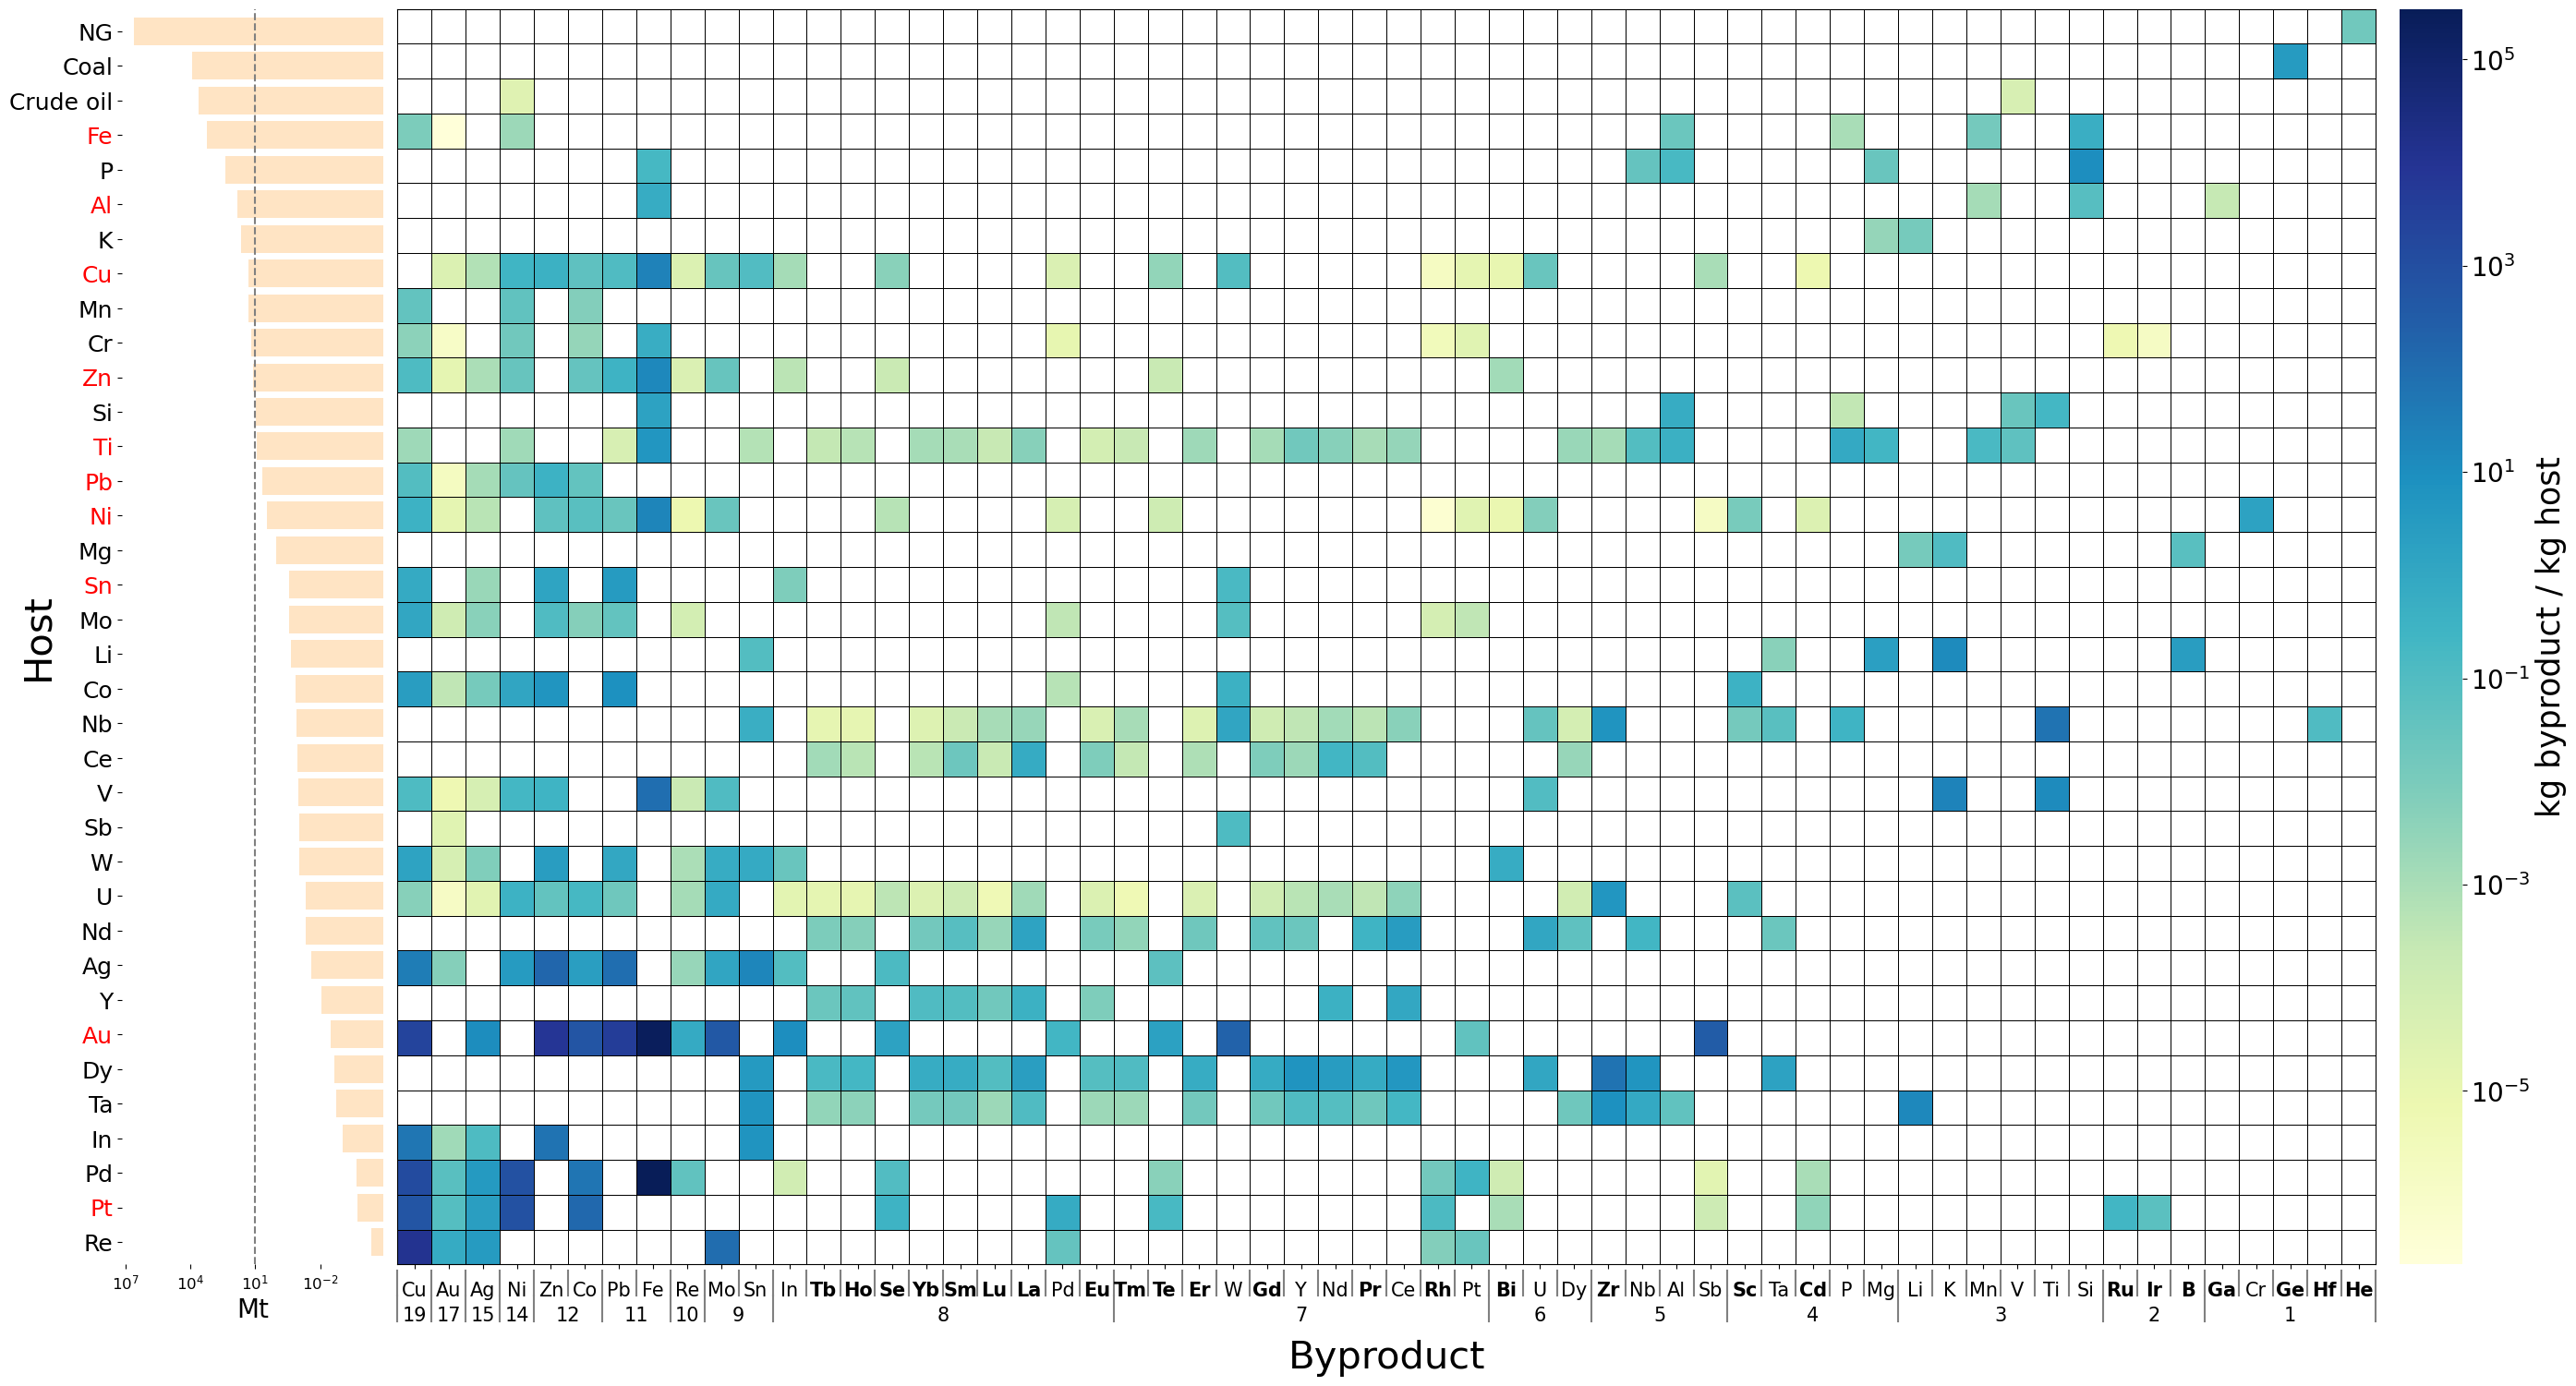

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(30,15),gridspec_kw={'width_ratios': [2,18]})
spacing = 0.500
plt.subplots_adjust(bottom=0.1)

#plt.subplots(1,2)

## position du heatmap (left = 0 or right = 1)
h_pos = 1
## plot heatmap
bx = sns.heatmap(df_mean, norm=LogNorm(), ax=ax[h_pos],cmap="YlGnBu",cbar=True, 
            cbar_kws={"orientation": "vertical","location":"right",'label': 'kg byproduct / kg host', 'pad':0.01},yticklabels=False,
                linewidths=0.5, linecolor='black') # 
#cbar = ax[0].collections[-1].colorbar
#,cbar=True,cbar_kws={'label': 'kg byproduct / kg host'}
for _, spine in bx.spines.items():
    spine.set_visible(True)

ax[h_pos].set_xlabel("Byproduct",fontsize=30)
ax[h_pos].xaxis.set_label_coords(.5, -.06)
ax[h_pos].tick_params(axis='x', labelsize=15)
ax[h_pos].tick_params(axis='y', labelsize=15)
ax[h_pos].set(ylabel=None)



b_pos = 0
barplot = prod_2021_host.iloc[::-1].plot.barh(y="Prod (Mt)",ax=ax[b_pos],
                                              width=0.8, color = "bisque").set_xscale('log')
ax[b_pos].axvline(x=10,color='gray', linestyle='dashed')
ax[b_pos].invert_xaxis()
ax[b_pos].legend_.remove()
ax[b_pos].set(ylabel=None)
ax[b_pos].tick_params(axis='x', labelsize=12)
ax[b_pos].set(ylabel=None)
ax[b_pos].tick_params(axis='y', labelsize=18)
ax[b_pos].set_frame_on(False)
ax[b_pos].set_xlabel("Mt",fontsize=20)
ax[b_pos].set_ylabel("Host",fontsize=30)
ax[b_pos].yaxis.set_label_coords(-.25, .5)
# ,cbar_kws={'label': 'kg byproduct / kg host'}


ax[1].figure.axes[-1].yaxis.label.set_size(25)
ax[1].tick_params(axis='x', which='major', pad=5)

## Red names for host indicated in Nassar et al. 2015
first_elements_nassar = ["Fe","Al","Cu","Zn","Pb","Ni","Au","Pt","Sn","Ti"] 
plt.setp(ax[0].get_yticklabels()[1], color='red') ## Pt
plt.setp(ax[0].get_yticklabels()[6], color='red') ## Au
plt.setp(ax[0].get_yticklabels()[19], color='red') ## Sn
plt.setp(ax[0].get_yticklabels()[21:24], color='red') ## Ni, Pb, Ti
plt.setp(ax[0].get_yticklabels()[25], color='red') ## Zn
#plt.setp(ax[0].get_yticklabels()[27], color='red') ## 
plt.setp(ax[0].get_yticklabels()[28], color='red') ## Al
plt.setp(ax[0].get_yticklabels()[30], color='red') ## Cu
plt.setp(ax[0].get_yticklabels()[32], color='red') ## Fe



# print(len([text.get_position()[0] for text in ax.get_xticklabels()]))
ax[1].set_xticks(ticks = [text.get_position()[0] for text in ax[1].get_xticklabels()],
              labels=ar_byp_bis)

# here set the labelsize by 20
cbar = ax[1].collections[-1].colorbar
cbar.ax.tick_params(labelsize=20)
ax[h_pos].xaxis.set_tick_params(labelbottom=False)
label_group_bar_table(ax[h_pos], df_mean,list_pure_byproduct)

#label_group_bar_table(ax[h_pos], df_mean_clean,list_pure_byproduct)
#add_horizontal_line(ax[h_pos], 0, 0.5,df_mean)
plt.tight_layout()

fig1 = plt.gcf()
#plt.draw()
path = "[folder_path_export_fig4]"
#fig1.savefig(path+'Figure4_BtH.png', format='png',dpi=1200)
#plt.show()
#plt.savefig(path+'Figure4_BtH.png', dpi=500)